# Data Exploration

In [105]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_2018 = pd.read_csv('/content/drive/MyDrive/Radiomics Journey/BraTS2018_Features_T1.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Radiomics Journey/BraTS2019_Features_T1.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Radiomics Journey/BraTS2020_Features_T1.csv')

In [4]:
combined_df = pd.concat([df_2019, df_2018, df_2020], ignore_index=True)
combined_df.head(5)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},33e08f677effad5e6754e93801c0729343666c94,3D,"(1.0, 1.0, 1.0)",...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73620355b22a3b037d6fc276d63517e4eef37d70,3D,"(1.0, 1.0, 1.0)",...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG
2,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d9b9dee5c48b51d0edab0c5449bfed18b03f72e3,3D,"(1.0, 1.0, 1.0)",...,0.032918,6.067100,0.019917,2.249511e+05,5.781757,0.000646,33.321381,0.005766,0.117617,HGG
3,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fb07dcdfb04857334dc375bd17a2ab2d5b68d2da,3D,"(1.0, 1.0, 1.0)",...,0.052850,4.426734,0.087167,9.805270e+02,0.959756,0.034447,3.630403,0.015182,0.580946,HGG
4,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},215b71e2f162abf87c53da2a5c4df9cba50e88f1,3D,"(1.0, 1.0, 1.0)",...,0.014013,6.107923,0.034466,3.988700e+04,12.794691,0.000747,30.437174,0.017265,0.049882,HGG


In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 1002.5+ KB


In [6]:
combined_df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,987.000000,987.0,987.000000,987.00000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000,987.000000,987.000000,9.870000e+02,987.000000
mean,100.419322,0.0,1672.704064,23053.06383,34.120567,0.724093,0.558648,24.815358,46.140158,45.342468,...,371.695071,0.031734,5.687619,0.093629,6.346101e+05,44.656442,0.008225,4158.768727,3.121610e-02,1.338644
std,181.386113,0.0,3665.553112,31120.99258,36.995047,0.154672,0.146571,10.304120,19.632103,16.316431,...,2709.225947,0.050217,1.086697,0.121170,3.480346e+06,541.970306,0.034782,43455.120597,5.765481e-02,7.192097
min,6.609346,0.0,111.000000,47.00000,1.000000,0.222498,0.124907,3.738339,7.287142,8.062258,...,1.078749,0.000039,1.584963,0.000322,5.684114e-01,0.004755,0.000090,0.000411,1.629837e-07,0.000775
25%,45.814439,0.0,677.000000,3940.00000,8.000000,0.636463,0.467046,17.393009,33.002982,33.726661,...,18.171201,0.008201,5.029857,0.024848,2.494205e+03,2.126595,0.000557,16.337047,1.078379e-02,0.052495
50%,57.602020,0.0,879.000000,10557.00000,22.000000,0.742091,0.577956,23.725280,44.100150,43.737855,...,36.058104,0.017787,5.595141,0.055704,1.988103e+04,5.688429,0.001121,41.322484,1.876903e-02,0.140416
75%,84.883105,0.0,1426.000000,26654.00000,48.000000,0.841569,0.663829,31.149995,56.950923,56.080300,...,81.009330,0.035183,6.330676,0.101408,1.032853e+05,14.081624,0.003168,114.502173,2.851293e-02,0.399436
max,1778.219889,0.0,32767.000000,189152.00000,270.000000,0.984177,0.878147,59.587263,171.979417,105.475116,...,44923.941306,0.559769,8.940406,0.770955,4.237417e+07,9818.926992,0.521373,670390.979289,6.787136e-01,106.860586


In [7]:
for column in combined_df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [8]:
combined_df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [9]:
combined_df.drop(columns=["diagnostics_Versions_PyRadiomics",
                          "diagnostics_Versions_Numpy",
                          "diagnostics_Versions_SimpleITK",
                          "diagnostics_Versions_PyWavelet",
                          "diagnostics_Versions_Python",
                          "diagnostics_Configuration_Settings",
                          "diagnostics_Configuration_EnabledImageTypes",
                          "diagnostics_Image-original_Hash",
                          "diagnostics_Image-original_Dimensionality",
                          "diagnostics_Image-original_Spacing",
                          "diagnostics_Image-original_Size",
                          "diagnostics_Mask-original_Hash",
                          "diagnostics_Mask-original_Spacing",
                          "diagnostics_Mask-original_Size",
                          "diagnostics_Mask-original_BoundingBox",
                          "diagnostics_Mask-original_CenterOfMassIndex",
                          "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 871.5+ KB


In [11]:
combined_df.to_csv("/content/combined_df.csv", index=False)

In [12]:
combined_df.shape

(987, 113)

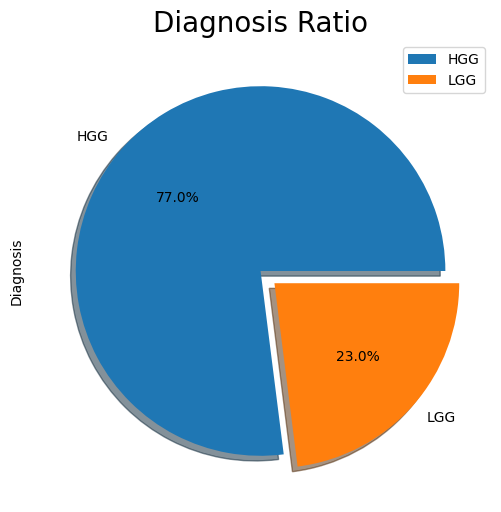

In [13]:
plt.figure(figsize=(13,6))
combined_df['Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title("Diagnosis Ratio", fontsize = 20)
plt.legend(['HGG','LGG'])
plt.show()

In [14]:
combined_df.head(5)

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,63.008830,0.0,1043.0,27189,115,0.739545,0.687078,30.967202,45.070872,57.428216,...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,42.644644,0.0,726.0,45839,108,0.712809,0.693697,39.632601,57.132479,64.884513,...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG
2,46.487673,0.0,594.0,34343,85,0.878777,0.533268,35.224154,66.053440,65.795137,...,0.032918,6.067100,0.019917,2.249511e+05,5.781757,0.000646,33.321381,0.005766,0.117617,HGG
3,63.166312,0.0,1042.0,413,18,0.770522,0.445620,8.942993,20.068633,25.553865,...,0.052850,4.426734,0.087167,9.805270e+02,0.959756,0.034447,3.630403,0.015182,0.580946,HGG
4,107.963487,0.0,1696.0,21122,95,0.880661,0.523184,26.644419,50.927387,53.665631,...,0.014013,6.107923,0.034466,3.988700e+04,12.794691,0.000747,30.437174,0.017265,0.049882,HGG


# Preprocessing

In [15]:
X=combined_df.drop(columns=['Diagnosis'],axis=1)

In [16]:
le=LabelEncoder()
Y=le.fit_transform(combined_df['Diagnosis'])

In [17]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [19]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_test Shape: {y_test.shape}")

X_train Shape: (789, 112)
y_train Shape: (789,)
X_test Shape: (198, 112)
X_test Shape: (198,)


# Machine Learning

**K-NN**

In [20]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [21]:
MSE = [1 - x for x in cv_scores]

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


Train score:100.00
Test score:97.98
K-fold accuracy:97.72
Standard Deviation:2.64
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:97.72
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

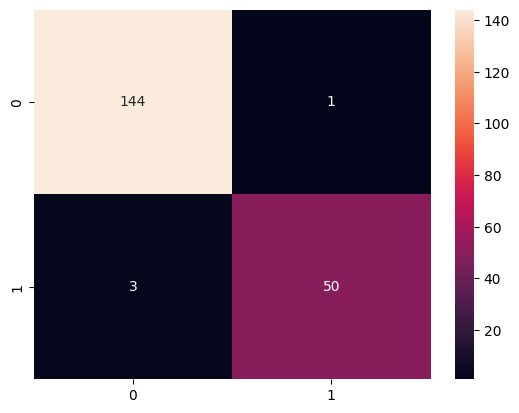

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
train_knn = knn.score(X_train , y_train)*100
print(f"Train score:{(train_knn):.2f}")
test_knn = knn.score(X_test , y_test)*100
print(f"Test score:{(test_knn):.2f}")
kfold_knn = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_knn):.2f}")
Kfold_Std_knn = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_knn):.2f}")
f1_knn = f1_score(y_test , knn_pred)*100
print(f"F1 Score: {f1_knn:.2f}")
re_knn = recall_score(y_test , knn_pred)*100
print(f"Recall Score: {re_knn:.2f}")
pre_knn = precision_score(y_test , knn_pred)*100
print(f"Precision Score: {pre_knn:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_knn = tn / (tn + fp)*100
print(f"Specificity: {speci_knn:.2f}")
acc_knn = accuracies.mean()*100
print(f"Accuracy:{(acc_knn):.2f}")
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


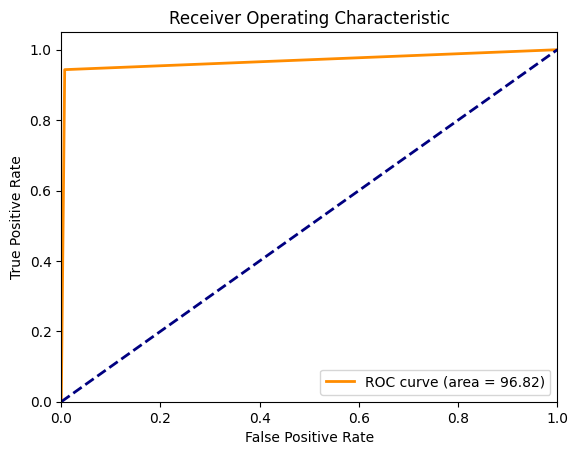

In [23]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
roc_knn = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_knn:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

Train score:96.83
Test score:90.91
K-fold accuracy:95.57
Standard Deviation:1.29
F1 Score: 80.85
Recall Score: 71.70
Precision Score: 92.68
Specificity: 99.31
Accuracy:95.57
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       145
           1       0.93      0.72      0.81        53

    accuracy                           0.91       198
   macro avg       0.92      0.85      0.87       198
weighted avg       0.91      0.91      0.91       198



<Axes: >

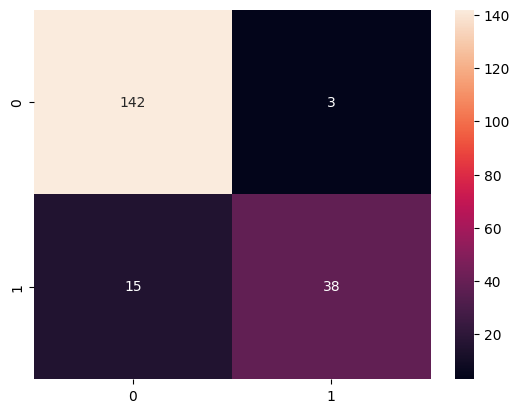

In [24]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_pred = lgr.predict(X_test)
accuracies = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 10)
train_lgr = lgr.score(X_train , y_train)*100
print(f"Train score:{(train_lgr):.2f}")
test_lgr = lgr.score(X_test , y_test)*100
print(f"Test score:{(test_lgr):.2f}")
kfold_lgr = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_lgr):.2f}")
Kfold_Std_lgr = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_lgr):.2f}")
f1_lgr = f1_score(y_test , lgr_pred)*100
print(f"F1 Score: {f1_lgr:.2f}")
re_lgr = recall_score(y_test , lgr_pred)*100
print(f"Recall Score: {re_lgr:.2f}")
pre_lgr = precision_score(y_test , lgr_pred)*100
print(f"Precision Score: {pre_lgr:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_lgr = tn / (tn + fp)*100
print(f"Specificity: {speci_lgr:.2f}")
acc_lgr = accuracies.mean()*100
print(f"Accuracy:{(acc_lgr):.2f}")
print(classification_report(y_test, lgr_pred))
sns.heatmap(confusion_matrix(y_test,lgr_pred), annot= True, fmt= 'g')

ROC AUC: 84.81


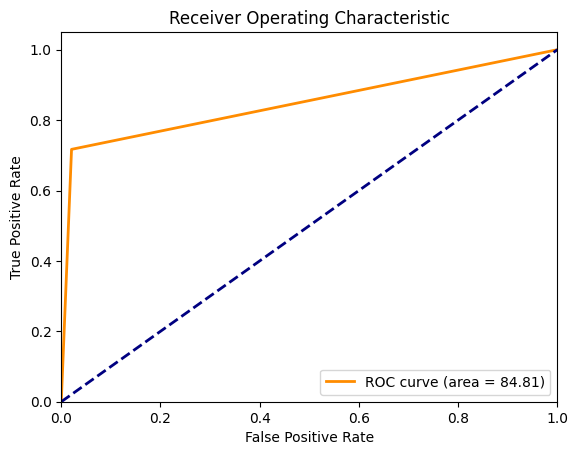

In [25]:
fpr, tpr, _ = roc_curve(y_test, lgr_pred)
roc_lgr = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_lgr:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_lgr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Decision Tree Classifier**

Train score:100.00
Test score:97.98
K-fold accuracy:98.35
Standard Deviation:1.80
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:98.35
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

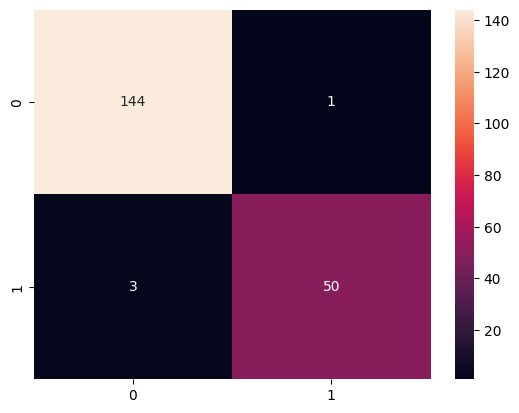

In [26]:
dtr = DecisionTreeClassifier(criterion = 'entropy',random_state = 40)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
accuracies = cross_val_score(estimator = dtr, X = X_train, y = y_train, cv = 10)
train_dtr = dtr.score(X_train , y_train)*100
print(f"Train score:{(train_dtr):.2f}")
test_dtr = dtr.score(X_test , y_test)*100
print(f"Test score:{(test_dtr):.2f}")
kfold_dtr = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_dtr):.2f}")
Kfold_Std_dtr = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_dtr):.2f}")
f1_dtr = f1_score(y_test , dtr_pred)*100
print(f"F1 Score: {f1_dtr:.2f}")
re_dtr = recall_score(y_test , dtr_pred)*100
print(f"Recall Score: {re_dtr:.2f}")
pre_dtr = precision_score(y_test , dtr_pred)*100
print(f"Precision Score: {pre_dtr:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_dtr = tn / (tn + fp)*100
print(f"Specificity: {speci_dtr:.2f}")
acc_dtr = accuracies.mean()*100
print(f"Accuracy:{(acc_dtr):.2f}")
print(classification_report(y_test, dtr_pred))
sns.heatmap(confusion_matrix(y_test,dtr_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


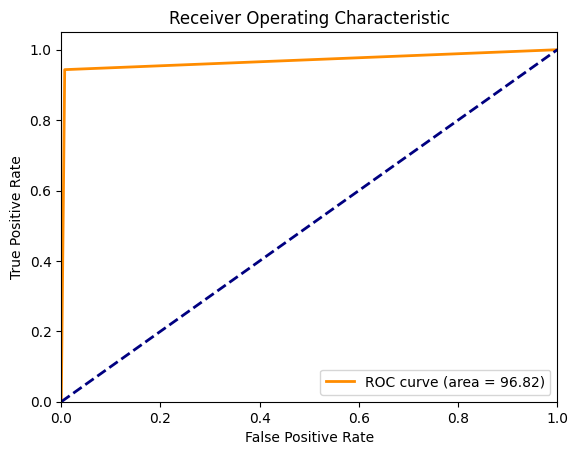

In [27]:
fpr, tpr, _ = roc_curve(y_test, dtr_pred)
roc_dtr = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_dtr:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_dtr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Naive Bayes**

Train score:83.14
Test score:77.78
K-fold accuracy:83.27
Standard Deviation:2.87
F1 Score: 55.10
Recall Score: 50.94
Precision Score: 60.00
Specificity: 87.59
Accuracy:83.27
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       145
           1       0.60      0.51      0.55        53

    accuracy                           0.78       198
   macro avg       0.72      0.69      0.70       198
weighted avg       0.77      0.78      0.77       198



<Axes: >

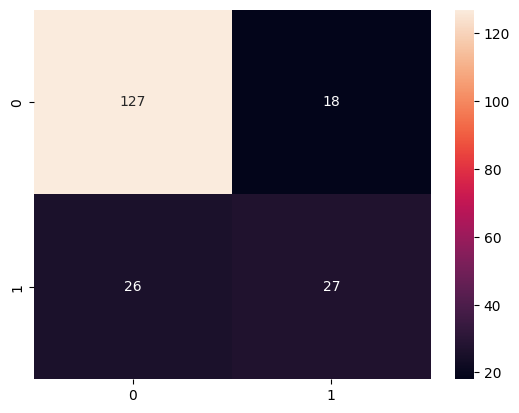

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
train_nb = nb.score(X_train , y_train)*100
print(f"Train score:{(train_nb):.2f}")
test_nb = nb.score(X_test , y_test)*100
print(f"Test score:{(test_nb):.2f}")
kfold_nb = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_nb):.2f}")
Kfold_Std_nb = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_nb):.2f}")
f1_nb = f1_score(y_test , nb_pred)*100
print(f"F1 Score: {f1_nb:.2f}")
re_nb = recall_score(y_test , nb_pred)*100
print(f"Recall Score: {re_nb:.2f}")
pre_nb = precision_score(y_test , nb_pred)*100
print(f"Precision Score: {pre_nb:.2f}")
cm = confusion_matrix(y_test, nb_pred)
tn, fp, fn, tp = cm.ravel()
speci_nb = tn / (tn + fp)*100
print(f"Specificity: {speci_nb:.2f}")
acc_nb = accuracies.mean()*100
print(f"Accuracy:{(acc_nb):.2f}")
print(classification_report(y_test, nb_pred))
sns.heatmap(confusion_matrix(y_test,nb_pred), annot= True, fmt= 'g')

ROC AUC: 69.26


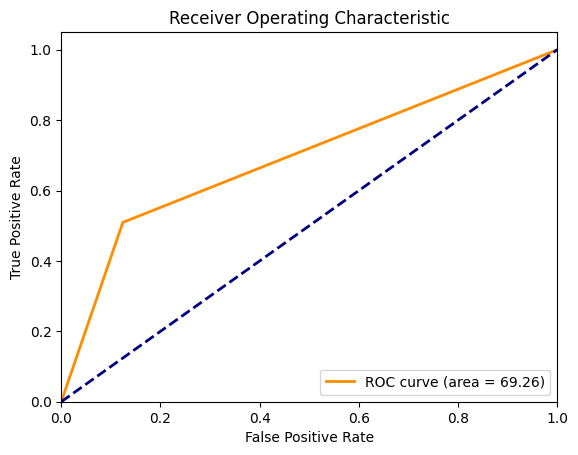

In [29]:
fpr, tpr, _ = roc_curve(y_test, nb_pred)
roc_nb = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_nb:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

Train score:100.00
Test score:98.48
K-fold accuracy:97.85
Standard Deviation:1.79
F1 Score: 97.09
Recall Score: 94.34
Precision Score: 100.00
Specificity: 100.00
Accuracy:97.85
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.94      0.97        53

    accuracy                           0.98       198
   macro avg       0.99      0.97      0.98       198
weighted avg       0.99      0.98      0.98       198



<Axes: >

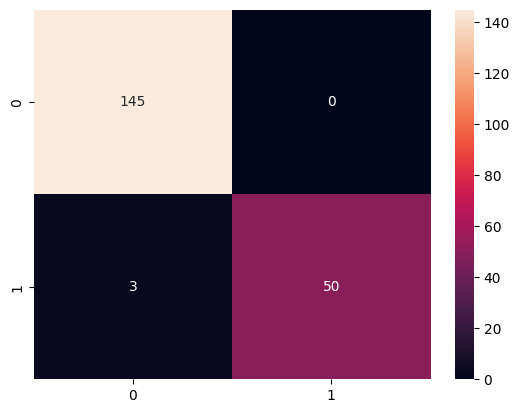

In [30]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
train_rf = rf.score(X_train , y_train)*100
print(f"Train score:{(train_rf):.2f}")
test_rf = rf.score(X_test , y_test)*100
print(f"Test score:{(test_rf):.2f}")
kfold_rf = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_rf):.2f}")
Kfold_Std_rf = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_rf):.2f}")
f1_rf = f1_score(y_test , rf_pred)*100
print(f"F1 Score: {f1_rf:.2f}")
re_rf = recall_score(y_test , rf_pred)*100
print(f"Recall Score: {re_rf:.2f}")
pre_rf = precision_score(y_test , rf_pred)*100
print(f"Precision Score: {pre_rf:.2f}")
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()
speci_rf = tn / (tn + fp)*100
print(f"Specificity: {speci_rf:.2f}")
acc_rf = accuracies.mean()*100
print(f"Accuracy:{(acc_rf):.2f}")
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test,rf_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


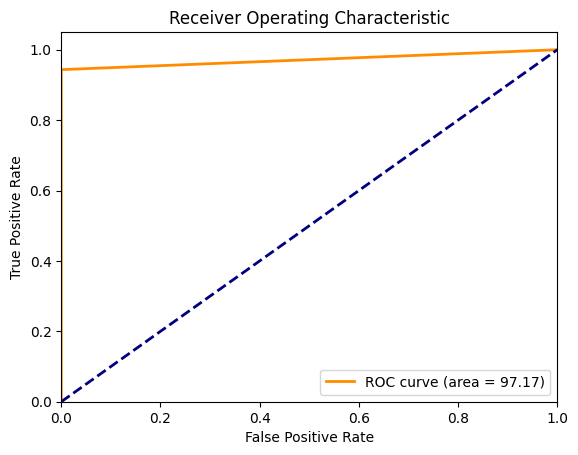

In [31]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_rf = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_rf:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM)**

Train score:96.70
Test score:90.40
K-fold accuracy:95.31
Standard Deviation:1.70
F1 Score: 80.81
Recall Score: 75.47
Precision Score: 86.96
Specificity: 95.86
Accuracy:95.31
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       145
           1       0.87      0.75      0.81        53

    accuracy                           0.90       198
   macro avg       0.89      0.86      0.87       198
weighted avg       0.90      0.90      0.90       198



<Axes: >

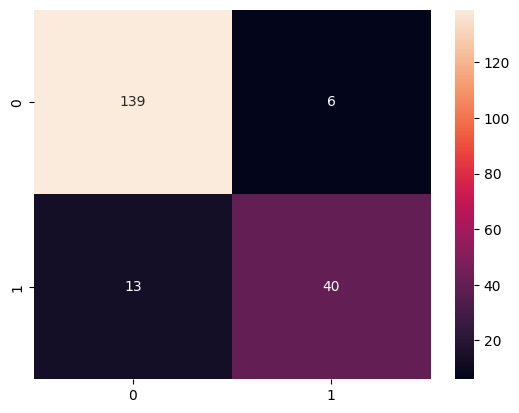

In [32]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
accuracies = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
train_svc = svc.score(X_train , y_train)*100
print(f"Train score:{(train_svc):.2f}")
test_svc = svc.score(X_test , y_test)*100
print(f"Test score:{(test_svc):.2f}")
kfold_svc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_svc):.2f}")
Kfold_Std_svc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_svc):.2f}")
f1_svc = f1_score(y_test , svc_pred)*100
print(f"F1 Score: {f1_svc:.2f}")
re_svc = recall_score(y_test , svc_pred)*100
print(f"Recall Score: {re_svc:.2f}")
pre_svc = precision_score(y_test , svc_pred)*100
print(f"Precision Score: {pre_svc:.2f}")
cm = confusion_matrix(y_test, svc_pred)
tn, fp, fn, tp = cm.ravel()
speci_svc = tn / (tn + fp)*100
print(f"Specificity: {speci_svc:.2f}")
acc_svc = accuracies.mean()*100
print(f"Accuracy:{(acc_svc):.2f}")
print(classification_report(y_test, svc_pred))
sns.heatmap(confusion_matrix(y_test,svc_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


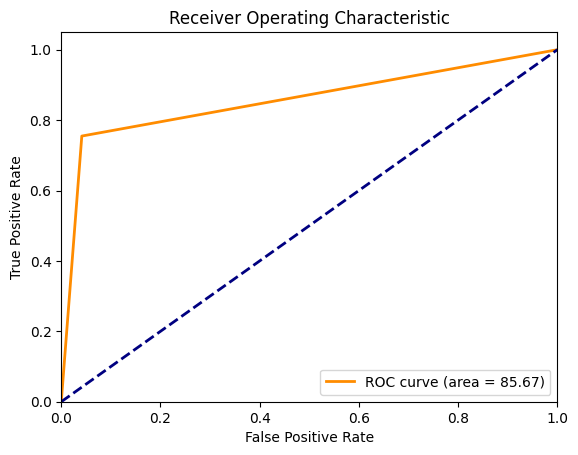

In [33]:
fpr, tpr, _ = roc_curve(y_test, svc_pred)
roc_svc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_rf:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Extra Trees Classifier**

Train score:100.00
Test score:98.48
K-fold accuracy:98.48
Standard Deviation:1.68
F1 Score: 97.09
Recall Score: 94.34
Precision Score: 100.00
Specificity: 100.00
Accuracy:98.48
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.94      0.97        53

    accuracy                           0.98       198
   macro avg       0.99      0.97      0.98       198
weighted avg       0.99      0.98      0.98       198



<Axes: >

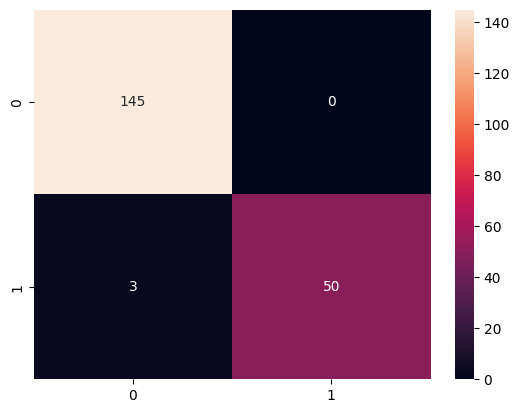

In [34]:
etc = ExtraTreesClassifier(random_state = 42 , n_estimators = 220)
etc.fit(X_train, y_train)
etc_pred = etc.predict(X_test)
accuracies = cross_val_score(estimator = etc, X = X_train, y = y_train, cv = 10)
train_etc = etc.score(X_train , y_train)*100
print(f"Train score:{(train_etc):.2f}")
test_etc = etc.score(X_test , y_test)*100
print(f"Test score:{(test_etc):.2f}")
kfold_etc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_etc):.2f}")
Kfold_Std_etc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_etc):.2f}")
f1_etc = f1_score(y_test , etc_pred)*100
print(f"F1 Score: {f1_etc:.2f}")
re_etc = recall_score(y_test , etc_pred)*100
print(f"Recall Score: {re_etc:.2f}")
pre_etc = precision_score(y_test , etc_pred)*100
print(f"Precision Score: {pre_etc:.2f}")
cm = confusion_matrix(y_test, etc_pred)
tn, fp, fn, tp = cm.ravel()
speci_etc = tn / (tn + fp)*100
print(f"Specificity: {speci_etc:.2f}")
acc_etc = accuracies.mean()*100
print(f"Accuracy:{(acc_etc):.2f}")
print(classification_report(y_test, etc_pred))
sns.heatmap(confusion_matrix(y_test,etc_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


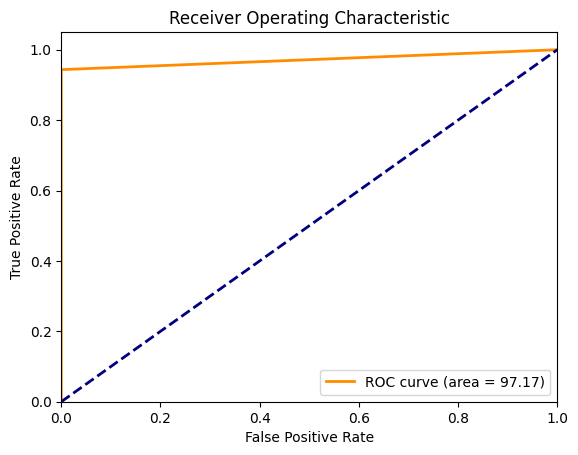

In [35]:
fpr, tpr, _ = roc_curve(y_test, etc_pred)
roc_etc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_etc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_etc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Stochastic Gradient Decent**

Train score:97.34
Test score:90.91
K-fold accuracy:94.17
Standard Deviation:1.98
F1 Score: 81.63
Recall Score: 75.47
Precision Score: 88.89
Specificity: 96.55
Accuracy:94.17
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       145
           1       0.89      0.75      0.82        53

    accuracy                           0.91       198
   macro avg       0.90      0.86      0.88       198
weighted avg       0.91      0.91      0.91       198



<Axes: >

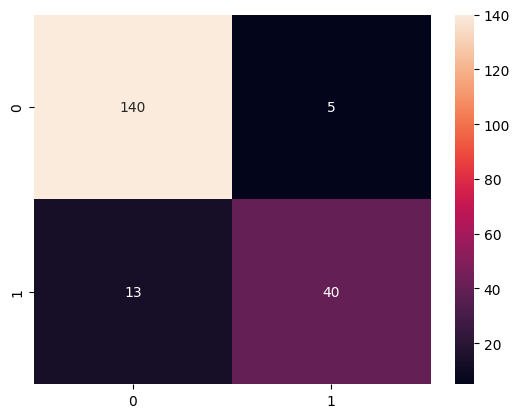

In [36]:
sgd = SGDClassifier(loss='log_loss', random_state=42, learning_rate='optimal')
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
accuracies = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
train_sgd = sgd.score(X_train , y_train)*100
print(f"Train score:{(train_sgd):.2f}")
test_sgd = sgd.score(X_test , y_test)*100
print(f"Test score:{(test_sgd):.2f}")
kfold_sgd = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_sgd):.2f}")
Kfold_Std_sgd = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_sgd):.2f}")
f1_sgd = f1_score(y_test , sgd_pred)*100
print(f"F1 Score: {f1_sgd:.2f}")
re_sgd = recall_score(y_test , sgd_pred)*100
print(f"Recall Score: {re_sgd:.2f}")
pre_sgd = precision_score(y_test , sgd_pred)*100
print(f"Precision Score: {pre_sgd:.2f}")
cm = confusion_matrix(y_test, sgd_pred)
tn, fp, fn, tp = cm.ravel()
speci_sgd = tn / (tn + fp)*100
print(f"Specificity: {speci_sgd:.2f}")
acc_sgd = accuracies.mean()*100
print(f"Accuracy:{(acc_sgd):.2f}")
print(classification_report(y_test, sgd_pred))
sns.heatmap(confusion_matrix(y_test,sgd_pred), annot= True, fmt= 'g')

ROC AUC: 86.01


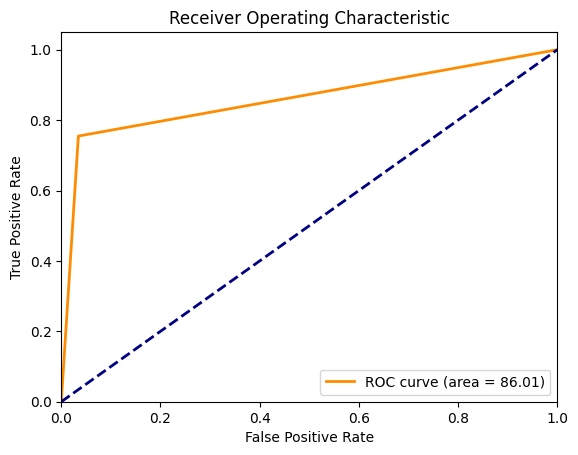

In [37]:
fpr, tpr, _ = roc_curve(y_test, sgd_pred)
roc_sgd = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_sgd:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_sgd)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Gradient Boosting Classifier**

Train score:100.00
Test score:97.98
K-fold accuracy:98.61
Standard Deviation:1.32
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:98.61
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

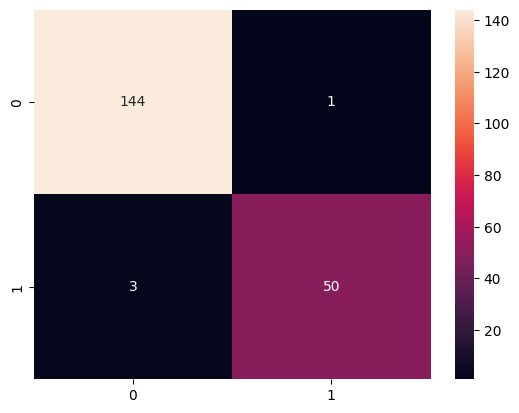

In [73]:
gbc = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
accuracies = cross_val_score(estimator = gbc, X = X_train, y = y_train, cv = 10)
train_gbc = gbc.score(X_train , y_train)*100
print(f"Train score:{(train_gbc):.2f}")
test_gbc = gbc.score(X_test , y_test)*100
print(f"Test score:{(test_gbc):.2f}")
kfold_gbc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_gbc):.2f}")
Kfold_Std_gbc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_gbc):.2f}")
f1_gbc = f1_score(y_test , gbc_pred)*100
print(f"F1 Score: {f1_gbc:.2f}")
re_gbc = recall_score(y_test , gbc_pred)*100
print(f"Recall Score: {re_gbc:.2f}")
pre_gbc = precision_score(y_test , gbc_pred)*100
print(f"Precision Score: {pre_gbc:.2f}")
cm = confusion_matrix(y_test, gbc_pred)
tn, fp, fn, tp = cm.ravel()
speci_gbc = tn / (tn + fp)*100
print(f"Specificity: {speci_gbc:.2f}")
acc_gbc = accuracies.mean()*100
print(f"Accuracy:{(acc_gbc):.2f}")
print(classification_report(y_test, gbc_pred))
sns.heatmap(confusion_matrix(y_test,gbc_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


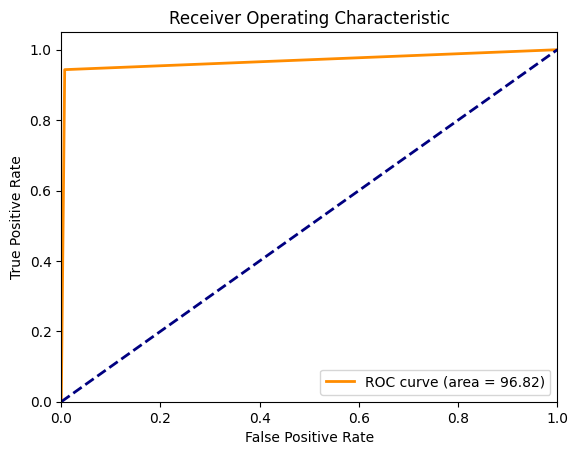

In [39]:
fpr, tpr, _ = roc_curve(y_test, gbc_pred)
roc_gbc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_gbc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Hist Gradient Boosting**

Train score:100.00
Test score:98.48
K-fold accuracy:98.61
Standard Deviation:1.44
F1 Score: 97.09
Recall Score: 94.34
Precision Score: 100.00
Specificity: 100.00
Accuracy:98.61
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.94      0.97        53

    accuracy                           0.98       198
   macro avg       0.99      0.97      0.98       198
weighted avg       0.99      0.98      0.98       198



<Axes: >

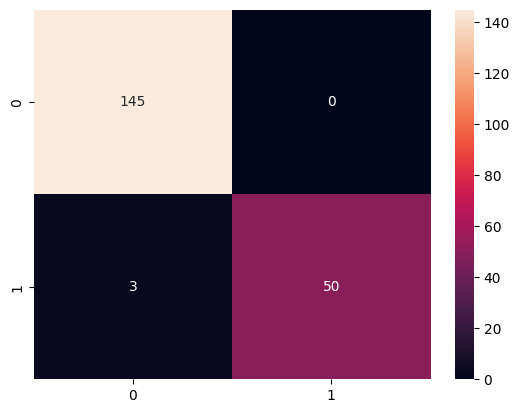

In [40]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)
hgb_pred = hgb.predict(X_test)
accuracies = cross_val_score(estimator = hgb, X = X_train, y = y_train, cv = 10)
train_hgb = hgb.score(X_train , y_train)*100
print(f"Train score:{(train_hgb):.2f}")
test_hgb = hgb.score(X_test , y_test)*100
print(f"Test score:{(test_hgb):.2f}")
kfold_hgb = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_hgb):.2f}")
Kfold_Std_hgb = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_hgb):.2f}")
f1_hgb = f1_score(y_test , hgb_pred)*100
print(f"F1 Score: {f1_hgb:.2f}")
re_hgb = recall_score(y_test , hgb_pred)*100
print(f"Recall Score: {re_hgb:.2f}")
pre_hgb = precision_score(y_test , hgb_pred)*100
print(f"Precision Score: {pre_hgb:.2f}")
cm = confusion_matrix(y_test, hgb_pred)
tn, fp, fn, tp = cm.ravel()
speci_hgb = tn / (tn + fp)*100
print(f"Specificity: {speci_hgb:.2f}")
acc_hgb = accuracies.mean()*100
print(f"Accuracy:{(acc_hgb):.2f}")
print(classification_report(y_test, hgb_pred))
sns.heatmap(confusion_matrix(y_test,hgb_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


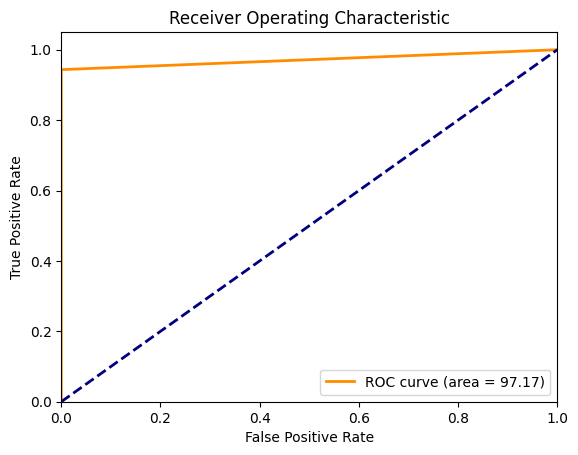

In [41]:
fpr, tpr, _ = roc_curve(y_test, hgb_pred)
roc_hgb = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_hgb:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_hgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Ada Boost Classifier**

Train score:100.00
Test score:97.98
K-fold accuracy:98.48
Standard Deviation:1.36
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:98.48
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

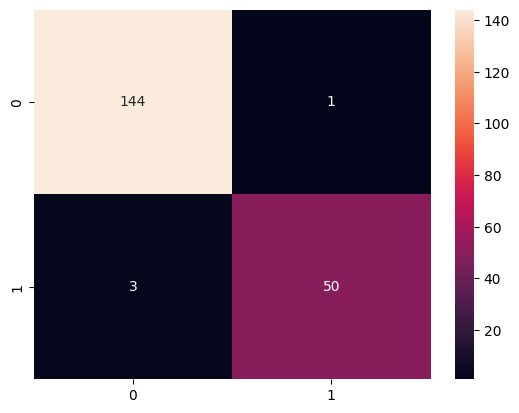

In [42]:
abc = AdaBoostClassifier(estimator = None,n_estimators=100)
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)
accuracies = cross_val_score(estimator = abc, X = X_train, y = y_train, cv = 10)
train_abc = abc.score(X_train , y_train)*100
print(f"Train score:{(train_abc):.2f}")
test_abc = abc.score(X_test , y_test)*100
print(f"Test score:{(test_abc):.2f}")
kfold_abc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_abc):.2f}")
Kfold_Std_abc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_abc):.2f}")
f1_abc = f1_score(y_test , abc_pred)*100
print(f"F1 Score: {f1_abc:.2f}")
re_abc = recall_score(y_test , abc_pred)*100
print(f"Recall Score: {re_abc:.2f}")
pre_abc = precision_score(y_test , abc_pred)*100
print(f"Precision Score: {pre_abc:.2f}")
cm = confusion_matrix(y_test, abc_pred)
tn, fp, fn, tp = cm.ravel()
speci_abc = tn / (tn + fp)*100
print(f"Specificity: {speci_abc:.2f}")
acc_abc = accuracies.mean()*100
print(f"Accuracy:{(acc_abc):.2f}")
print(classification_report(y_test, abc_pred))
sns.heatmap(confusion_matrix(y_test,abc_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


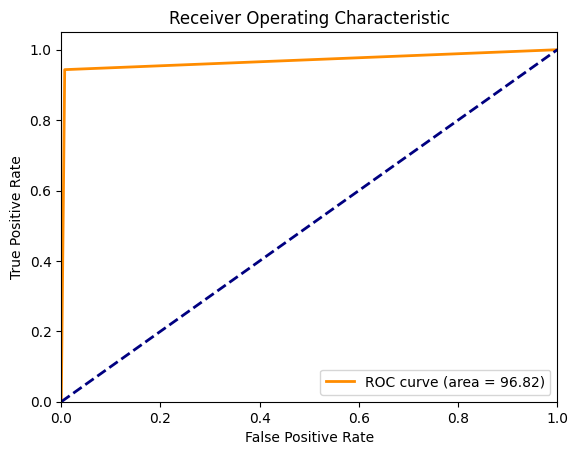

In [43]:
fpr, tpr, _ = roc_curve(y_test, abc_pred)
roc_abc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_abc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_abc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Cat Boost Classifier**

In [44]:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
22:	learn: 0.4901655	total: 601ms	remaining: 25.5s
23:	learn: 0.4815576	total: 625ms	remaining: 25.4s
24:	learn: 0.4757011	total: 651ms	remaining: 25.4s
25:	learn: 0.4688048	total: 679ms	remaining: 25.4s
26:	learn: 0.4629474	total: 702ms	remaining: 25.3s
27:	learn: 0.4558698	total: 727ms	remaining: 25.2s
28:	learn: 0.4486529	total: 760ms	remaining: 25.4s
29:	learn: 0.4423990	total: 785ms	remaining: 25.4s
30:	learn: 0.4367615	total: 807ms	remaining: 25.2s
31:	learn: 0.4305869	total: 831ms	remaining: 25.1s
32:	learn: 0.4245993	total: 854ms	remaining: 25s
33:	learn: 0.4177820	total: 878ms	remaining: 24.9s
34:	learn: 0.4100700	total: 911ms	remaining: 25.1s
35:	learn: 0.4064085	total: 938ms	remaining: 25.1s
36:	learn: 0.3994771	total: 964ms	remaining: 25.1s
37:	learn: 0.3942180	total: 995ms	remaining: 25.2s
38:	learn: 0.3875426	total: 1.02s	remaining: 25.1s
39:	learn: 0.3832544	total: 1.04s	remaining: 25s
40:	learn: 0.3789540	total: 1.07s	r

<Axes: >

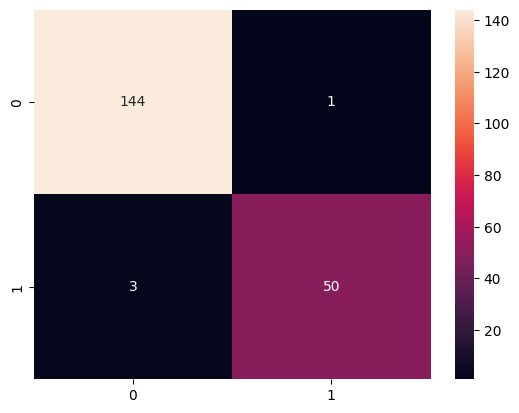

In [45]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)
cb_pred = cb.predict(X_test)
accuracies = cross_val_score(estimator = cb, X = X_train, y = y_train, cv = 10)
train_cb = cb.score(X_train , y_train)*100
print(f"Train score:{(train_cb):.2f}")
test_cb = cb.score(X_test , y_test)*100
print(f"Test score:{(test_cb):.2f}")
kfold_cb = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_cb):.2f}")
Kfold_Std_cb = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_cb):.2f}")
f1_cb = f1_score(y_test , cb_pred)*100
print(f"F1 Score: {f1_cb:.2f}")
re_cb = recall_score(y_test , cb_pred)*100
print(f"Recall Score: {re_cb:.2f}")
pre_cb = precision_score(y_test , cb_pred)*100
print(f"Precision Score: {pre_cb:.2f}")
cm = confusion_matrix(y_test, cb_pred)
tn, fp, fn, tp = cm.ravel()
speci_cb = tn / (tn + fp)*100
print(f"Specificity: {speci_cb:.2f}")
acc_cb = accuracies.mean()*100
print(f"Accuracy:{(acc_cb):.2f}")
print(classification_report(y_test, cb_pred))
sns.heatmap(confusion_matrix(y_test,cb_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


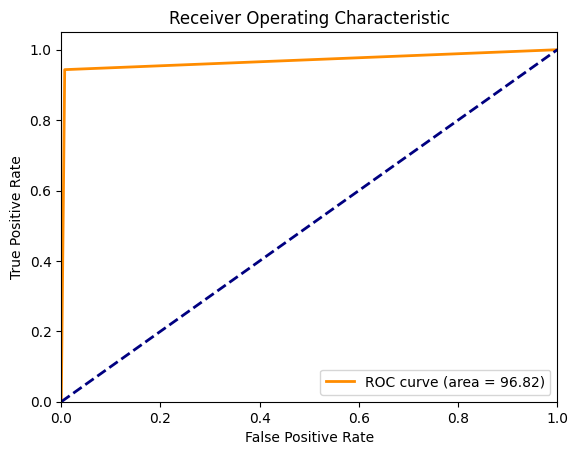

In [46]:
fpr, tpr, _ = roc_curve(y_test, cb_pred)
roc_cb = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_cb:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_cb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**XGBoost Classifier**

Train score:100.00
Test score:97.98
K-fold accuracy:98.86
Standard Deviation:1.44
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:98.86
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

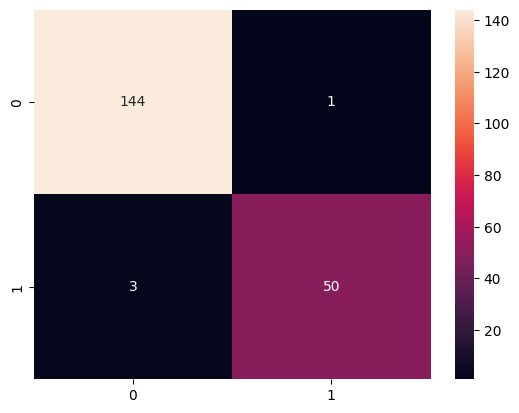

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
train_xgb = xgb.score(X_train , y_train)*100
print(f"Train score:{(train_xgb):.2f}")
test_xgb = xgb.score(X_test , y_test)*100
print(f"Test score:{(test_xgb):.2f}")
kfold_xgb = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_xgb):.2f}")
Kfold_Std_xgb = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_xgb):.2f}")
f1_xgb = f1_score(y_test , xgb_pred)*100
print(f"F1 Score: {f1_xgb:.2f}")
re_xgb = recall_score(y_test , xgb_pred)*100
print(f"Recall Score: {re_xgb:.2f}")
pre_xgb = precision_score(y_test , xgb_pred)*100
print(f"Precision Score: {pre_xgb:.2f}")
cm = confusion_matrix(y_test, xgb_pred)
tn, fp, fn, tp = cm.ravel()
speci_xgb = tn / (tn + fp)*100
print(f"Specificity: {speci_xgb:.2f}")
acc_xgb = accuracies.mean()*100
print(f"Accuracy:{(acc_xgb):.2f}")
print(classification_report(y_test, xgb_pred))
sns.heatmap(confusion_matrix(y_test,xgb_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


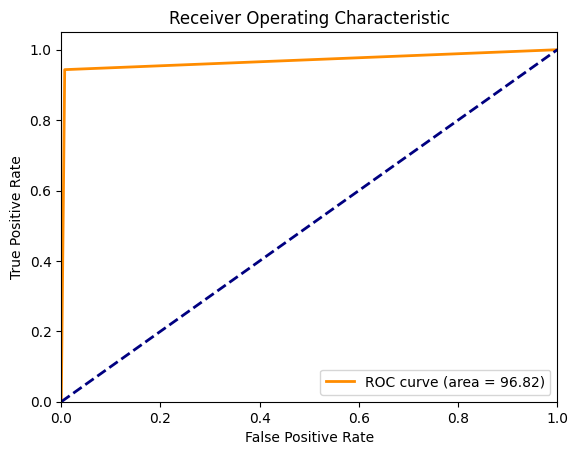

In [48]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
roc_xgb = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_xgb:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Light GBM**

[LightGBM] [Info] Number of positive: 174, number of negative: 615
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25950
[LightGBM] [Info] Number of data points in the train set: 789, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220532 -> initscore=-1.262567
[LightGBM] [Info] Start training from score -1.262567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 157, number of negative: 553
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the 

<Axes: >

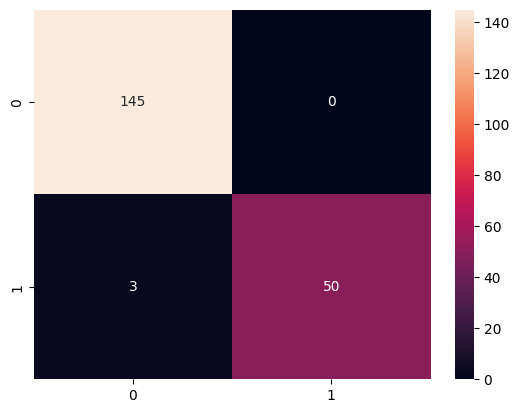

In [49]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
accuracies = cross_val_score(estimator = lgbm, X = X_train, y = y_train, cv = 10)
train_lgbm = lgbm.score(X_train , y_train)*100
print(f"Train score:{(train_lgbm):.2f}")
test_lgbm = lgbm.score(X_test , y_test)*100
print(f"Test score:{(test_lgbm):.2f}")
kfold_lgbm = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_lgbm):.2f}")
Kfold_Std_lgbm = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_lgbm):.2f}")
f1_lgbm = f1_score(y_test , lgbm_pred)*100
print(f"F1 Score: {f1_lgbm:.2f}")
re_lgbm = recall_score(y_test , lgbm_pred)*100
print(f"Recall Score: {re_lgbm:.2f}")
pre_lgbm = precision_score(y_test , lgbm_pred)*100
print(f"Precision Score: {pre_lgbm:.2f}")
cm = confusion_matrix(y_test, lgbm_pred)
tn, fp, fn, tp = cm.ravel()
speci_lgbm = tn / (tn + fp)*100
print(f"Specificity: {speci_lgbm:.2f}")
acc_lgbm = accuracies.mean()*100
print(f"Accuracy:{(acc_lgbm):.2f}")
print(classification_report(y_test, lgbm_pred))
sns.heatmap(confusion_matrix(y_test,lgbm_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


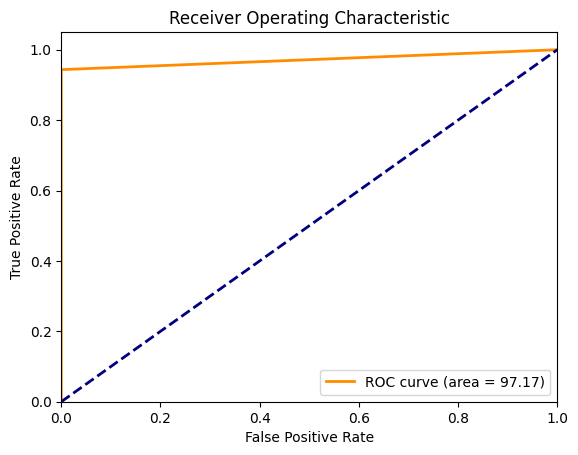

In [51]:
fpr, tpr, _ = roc_curve(y_test, lgbm_pred)
roc_lgbm = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_lgbm:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_lgbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**XGBRF Classifier**

Train score:97.72
Test score:91.41
K-fold accuracy:97.47
Standard Deviation:1.88
F1 Score: 82.11
Recall Score: 73.58
Precision Score: 92.86
Specificity: 97.93
Accuracy:97.47
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       145
           1       0.93      0.74      0.82        53

    accuracy                           0.91       198
   macro avg       0.92      0.86      0.88       198
weighted avg       0.92      0.91      0.91       198



<Axes: >

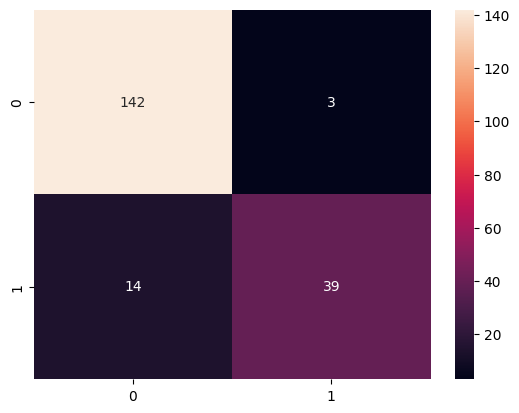

In [53]:
xgbrf = XGBRFClassifier()
xgbrf.fit(X_train, y_train)
xgbrf_pred = xgbrf.predict(X_test)
accuracies = cross_val_score(estimator = xgbrf, X = X_train, y = y_train, cv = 10)
train_xgbrf = xgbrf.score(X_train , y_train)*100
print(f"Train score:{(train_xgbrf):.2f}")
test_xgbrf = xgbrf.score(X_test , y_test)*100
print(f"Test score:{(test_xgbrf):.2f}")
kfold_xgbrf = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_xgbrf):.2f}")
Kfold_Std_xgbrf = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_xgbrf):.2f}")
f1_xgbrf = f1_score(y_test , xgbrf_pred)*100
print(f"F1 Score: {f1_xgbrf:.2f}")
re_xgbrf = recall_score(y_test , xgbrf_pred)*100
print(f"Recall Score: {re_xgbrf:.2f}")
pre_xgbrf = precision_score(y_test , xgbrf_pred)*100
print(f"Precision Score: {pre_xgbrf:.2f}")
cm = confusion_matrix(y_test, xgbrf_pred)
tn, fp, fn, tp = cm.ravel()
speci_xgbrf = tn / (tn + fp)*100
print(f"Specificity: {speci_xgbrf:.2f}")
acc_xgbrf = accuracies.mean()*100
print(f"Accuracy:{(acc_xgbrf):.2f}")
print(classification_report(y_test, xgbrf_pred))
sns.heatmap(confusion_matrix(y_test,xgbrf_pred), annot= True, fmt= 'g')

ROC AUC: 85.76


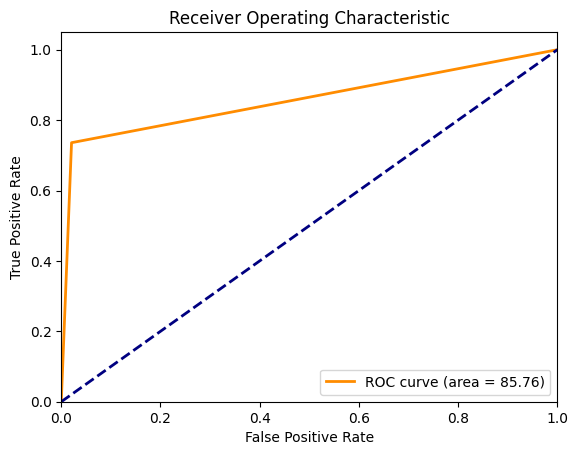

In [54]:
fpr, tpr, _ = roc_curve(y_test, xgbrf_pred)
roc_xgbrf = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_xgbrf:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_xgbrf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Bagging Classifier**

Train score:100.00
Test score:97.98
K-fold accuracy:98.23
Standard Deviation:1.98
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:98.23
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

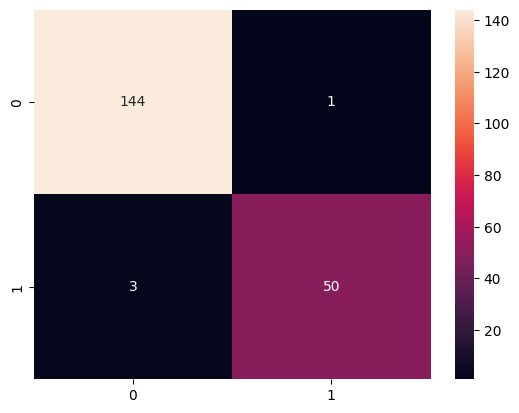

In [58]:
bagc = BaggingClassifier()
bagc.fit(X_train, y_train)
bagc_pred = bagc.predict(X_test)
accuracies = cross_val_score(estimator = bagc, X = X_train, y = y_train, cv = 10)
train_bagc = bagc.score(X_train , y_train)*100
print(f"Train score:{(train_bagc):.2f}")
test_bagc = bagc.score(X_test , y_test)*100
print(f"Test score:{(test_bagc):.2f}")
kfold_bagc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_bagc):.2f}")
Kfold_Std_bagc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_bagc):.2f}")
f1_bagc = f1_score(y_test , bagc_pred)*100
print(f"F1 Score: {f1_bagc:.2f}")
re_bagc = recall_score(y_test , bagc_pred)*100
print(f"Recall Score: {re_bagc:.2f}")
pre_bagc = precision_score(y_test , bagc_pred)*100
print(f"Precision Score: {pre_bagc:.2f}")
cm = confusion_matrix(y_test, bagc_pred)
tn, fp, fn, tp = cm.ravel()
speci_bagc = tn / (tn + fp)*100
print(f"Specificity: {speci_bagc:.2f}")
acc_bagc = accuracies.mean()*100
print(f"Accuracy:{(acc_bagc):.2f}")
print(classification_report(y_test, bagc_pred))
sns.heatmap(confusion_matrix(y_test,bagc_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


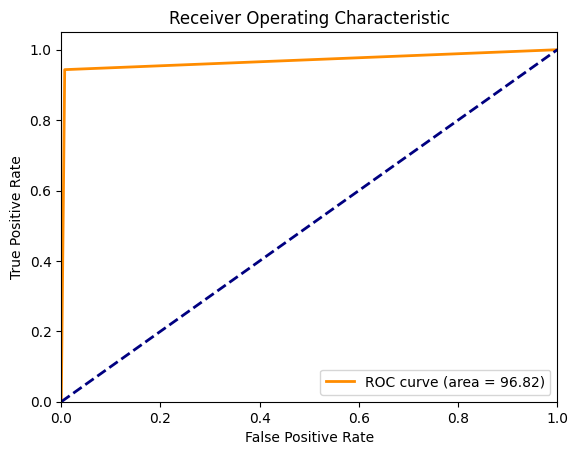

In [59]:
fpr, tpr, _ = roc_curve(y_test, bagc_pred)
roc_bagc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_bagc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_bagc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Voting Classifier**

Train score:100.00
Test score:98.48
K-fold accuracy:98.23
Standard Deviation:1.81
F1 Score: 97.09
Recall Score: 94.34
Precision Score: 100.00
Specificity: 100.00
Accuracy:98.23
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.94      0.97        53

    accuracy                           0.98       198
   macro avg       0.99      0.97      0.98       198
weighted avg       0.99      0.98      0.98       198



<Axes: >

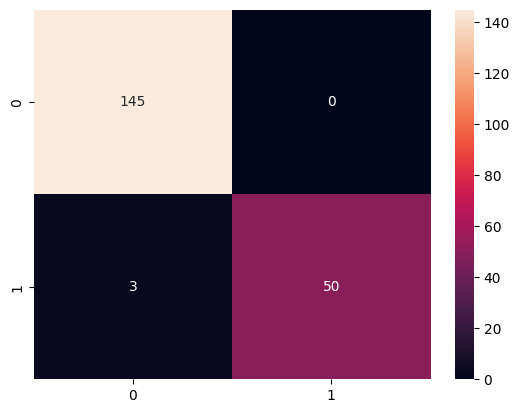

In [84]:
classifiers = [('rf', RandomForestClassifier()),
               ('gb', GradientBoostingClassifier()),
               ('lr', LogisticRegression()),
               ('dt', DecisionTreeClassifier()),
               ('svm', SVC())]
vtc = VotingClassifier(estimators=classifiers, voting='hard')
vtc.fit(X_train, y_train)
vtc_pred = vtc.predict(X_test)
accuracies = cross_val_score(estimator = vtc, X = X_train, y = y_train, cv = 10)
train_vtc = vtc.score(X_train , y_train)*100
print(f"Train score:{(train_vtc):.2f}")
test_vtc = vtc.score(X_test , y_test)*100
print(f"Test score:{(test_vtc):.2f}")
kfold_vtc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_vtc):.2f}")
Kfold_Std_vtc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_vtc):.2f}")
f1_vtc = f1_score(y_test , vtc_pred)*100
print(f"F1 Score: {f1_vtc:.2f}")
re_vtc = recall_score(y_test , vtc_pred)*100
print(f"Recall Score: {re_vtc:.2f}")
pre_vtc = precision_score(y_test , vtc_pred)*100
print(f"Precision Score: {pre_vtc:.2f}")
cm = confusion_matrix(y_test, vtc_pred)
tn, fp, fn, tp = cm.ravel()
speci_vtc = tn / (tn + fp)*100
print(f"Specificity: {speci_vtc:.2f}")
acc_vtc = accuracies.mean()*100
print(f"Accuracy:{(acc_vtc):.2f}")
print(classification_report(y_test, vtc_pred))
sns.heatmap(confusion_matrix(y_test,vtc_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


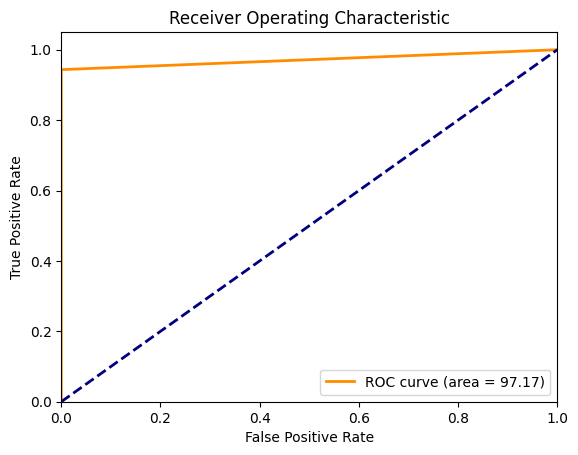

In [85]:
fpr, tpr, _ = roc_curve(y_test, vtc_pred)
roc_vtc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_vtc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_vtc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Stacking Classifier**

Train score:100.00
Test score:98.48
K-fold accuracy:98.61
Standard Deviation:1.55
F1 Score: 97.09
Recall Score: 94.34
Precision Score: 100.00
Specificity: 100.00
Accuracy:98.61
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.94      0.97        53

    accuracy                           0.98       198
   macro avg       0.99      0.97      0.98       198
weighted avg       0.99      0.98      0.98       198



<Axes: >

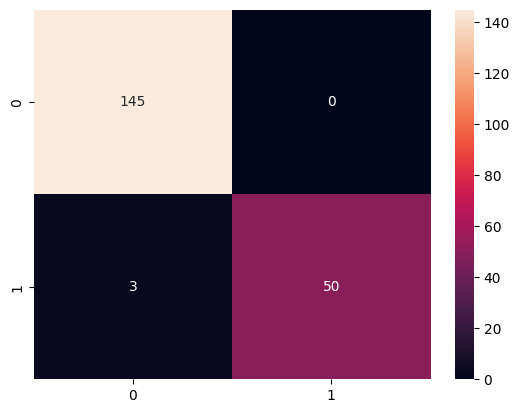

In [92]:
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]
stc = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)
stc.fit(X_train, y_train)
stc_pred = stc.predict(X_test)
accuracies = cross_val_score(estimator = stc, X = X_train, y = y_train, cv = 10)
train_stc = stc.score(X_train , y_train)*100
print(f"Train score:{(train_stc):.2f}")
test_stc = stc.score(X_test , y_test)*100
print(f"Test score:{(test_stc):.2f}")
kfold_stc = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_stc):.2f}")
Kfold_Std_stc = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_stc):.2f}")
f1_stc = f1_score(y_test , stc_pred)*100
print(f"F1 Score: {f1_stc:.2f}")
re_stc = recall_score(y_test , stc_pred)*100
print(f"Recall Score: {re_stc:.2f}")
pre_stc = precision_score(y_test , stc_pred)*100
print(f"Precision Score: {pre_stc:.2f}")
cm = confusion_matrix(y_test, stc_pred)
tn, fp, fn, tp = cm.ravel()
speci_stc = tn / (tn + fp)*100
print(f"Specificity: {speci_stc:.2f}")
acc_stc = accuracies.mean()*100
print(f"Accuracy:{(acc_stc):.2f}")
print(classification_report(y_test, stc_pred))
sns.heatmap(confusion_matrix(y_test,stc_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


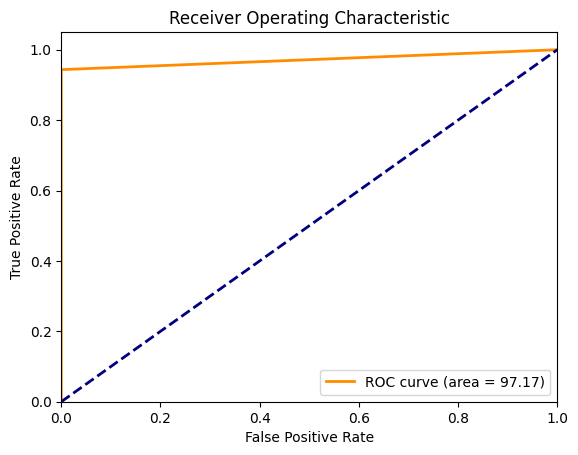

In [93]:
fpr, tpr, _ = roc_curve(y_test, stc_pred)
roc_stc = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_stc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_stc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Linear Discriminant Analysis**

Train score:96.45
Test score:93.43
K-fold accuracy:92.40
Standard Deviation:2.59
F1 Score: 86.02
Recall Score: 75.47
Precision Score: 100.00
Specificity: 100.00
Accuracy:92.40
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       145
           1       1.00      0.75      0.86        53

    accuracy                           0.93       198
   macro avg       0.96      0.88      0.91       198
weighted avg       0.94      0.93      0.93       198



<Axes: >

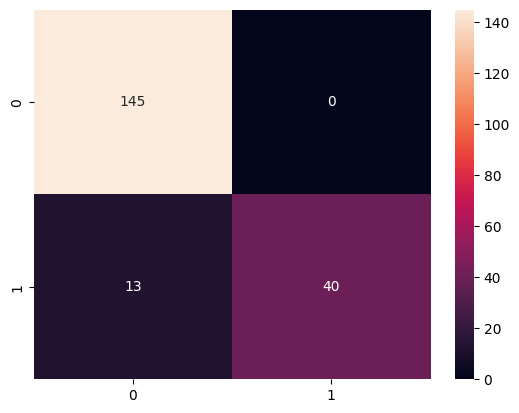

In [97]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
accuracies = cross_val_score(estimator = lda, X = X_train, y = y_train, cv = 10)
train_lda = lda.score(X_train , y_train)*100
print(f"Train score:{(train_lda):.2f}")
test_lda = lda.score(X_test , y_test)*100
print(f"Test score:{(test_lda):.2f}")
kfold_lda = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_lda):.2f}")
Kfold_Std_lda = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_lda):.2f}")
f1_lda = f1_score(y_test , lda_pred)*100
print(f"F1 Score: {f1_lda:.2f}")
re_lda = recall_score(y_test , lda_pred)*100
print(f"Recall Score: {re_lda:.2f}")
pre_lda = precision_score(y_test , lda_pred)*100
print(f"Precision Score: {pre_lda:.2f}")
cm = confusion_matrix(y_test, lda_pred)
tn, fp, fn, tp = cm.ravel()
speci_lda = tn / (tn + fp)*100
print(f"Specificity: {speci_lda:.2f}")
acc_lda = accuracies.mean()*100
print(f"Accuracy:{(acc_lda):.2f}")
print(classification_report(y_test, lda_pred))
sns.heatmap(confusion_matrix(y_test,lda_pred), annot= True, fmt= 'g')

ROC AUC: 87.74


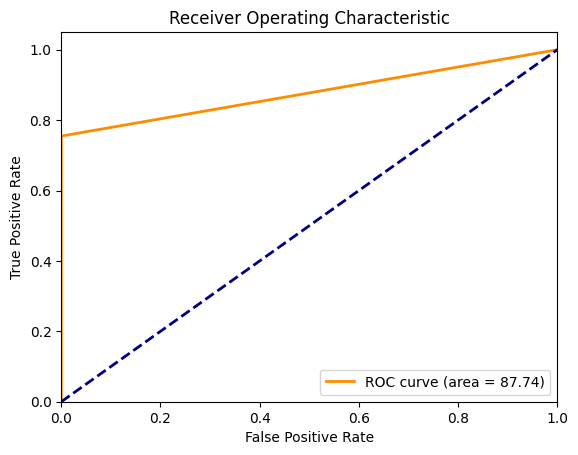

In [98]:
fpr, tpr, _ = roc_curve(y_test, lda_pred)
roc_lda = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_lda:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_lda)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Quadratic Discriminant Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Train score:100.00
Test score:96.97
K-fold accuracy:98.23
Standard Deviation:2.21
F1 Score: 94.00
Recall Score: 88.68
Precision Score: 100.00
Specificity: 100.00
Accuracy:98.23
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       145
           1       1.00      0.89      0.94        53

    accuracy                           0.97       198
   macro avg       0.98      0.94      0.96       198
weighted avg       0.97      0.97      0.97       198



<Axes: >

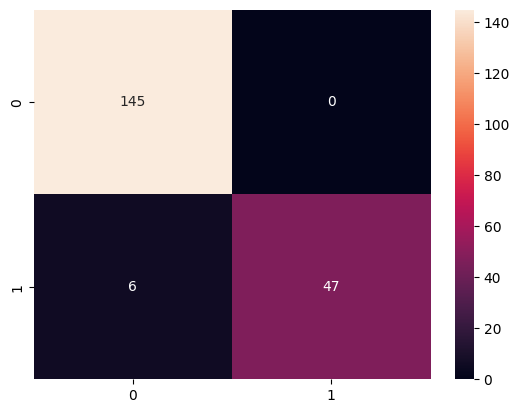

In [101]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
accuracies = cross_val_score(estimator = qda, X = X_train, y = y_train, cv = 10)
train_qda = qda.score(X_train , y_train)*100
print(f"Train score:{(train_qda):.2f}")
test_qda = qda.score(X_test , y_test)*100
print(f"Test score:{(test_qda):.2f}")
kfold_qda = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_qda):.2f}")
Kfold_Std_qda = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_qda):.2f}")
f1_qda = f1_score(y_test , qda_pred)*100
print(f"F1 Score: {f1_qda:.2f}")
re_qda = recall_score(y_test , qda_pred)*100
print(f"Recall Score: {re_qda:.2f}")
pre_qda = precision_score(y_test , qda_pred)*100
print(f"Precision Score: {pre_qda:.2f}")
cm = confusion_matrix(y_test, qda_pred)
tn, fp, fn, tp = cm.ravel()
speci_qda = tn / (tn + fp)*100
print(f"Specificity: {speci_qda:.2f}")
acc_qda = accuracies.mean()*100
print(f"Accuracy:{(acc_qda):.2f}")
print(classification_report(y_test, qda_pred))
sns.heatmap(confusion_matrix(y_test,qda_pred), annot= True, fmt= 'g')

ROC AUC: 94.34


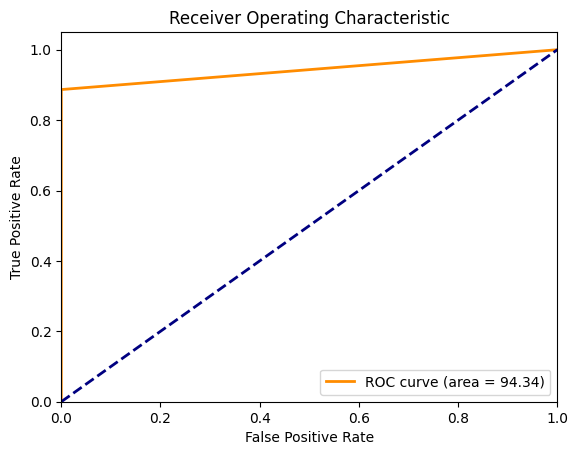

In [102]:
fpr, tpr, _ = roc_curve(y_test, qda_pred)
roc_qda = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_qda:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_qda)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Passive Aggressive Classifier**

Train score:94.30
Test score:86.87
K-fold accuracy:91.76
Standard Deviation:3.16
F1 Score: 72.34
Recall Score: 64.15
Precision Score: 82.93
Specificity: 95.17
Accuracy:91.76
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       145
           1       0.83      0.64      0.72        53

    accuracy                           0.87       198
   macro avg       0.85      0.80      0.82       198
weighted avg       0.87      0.87      0.86       198



<Axes: >

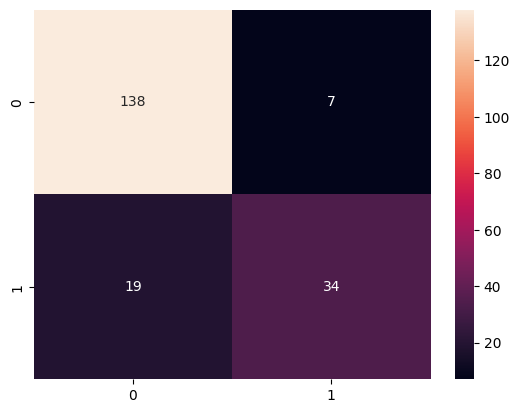

In [106]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
pac_pred = pac.predict(X_test)
accuracies = cross_val_score(estimator = pac, X = X_train, y = y_train, cv = 10)
train_pac = pac.score(X_train , y_train)*100
print(f"Train score:{(train_pac):.2f}")
test_pac = pac.score(X_test , y_test)*100
print(f"Test score:{(test_pac):.2f}")
kfold_pac = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_pac):.2f}")
Kfold_Std_pac = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_pac):.2f}")
f1_pac = f1_score(y_test , pac_pred)*100
print(f"F1 Score: {f1_pac:.2f}")
re_pac = recall_score(y_test , pac_pred)*100
print(f"Recall Score: {re_pac:.2f}")
pre_pac = precision_score(y_test , pac_pred)*100
print(f"Precision Score: {pre_pac:.2f}")
cm = confusion_matrix(y_test, pac_pred)
tn, fp, fn, tp = cm.ravel()
speci_pac = tn / (tn + fp)*100
print(f"Specificity: {speci_pac:.2f}")
acc_pac = accuracies.mean()*100
print(f"Accuracy:{(acc_pac):.2f}")
print(classification_report(y_test, pac_pred))
sns.heatmap(confusion_matrix(y_test,pac_pred), annot= True, fmt= 'g')

ROC AUC: 79.66


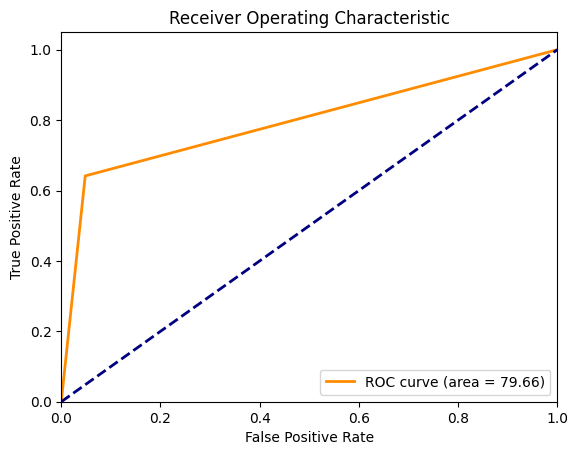

In [107]:
fpr, tpr, _ = roc_curve(y_test, pac_pred)
roc_pac = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_pac:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_pac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Experimental Results**

In [112]:
Model = pd.DataFrame({
    'Model Name': ['K-Nearest Neighbours','Logistic Regression','Decision Tree Classifier','Naive Bayes','Random Forest',
                   'Support Vector Machine','Extra Trees Classifier','Stochastic Gradient Decent','Gradient Boosting Classifier',
                   'Hist Gradient Boosting','Ada Boost Classifier','Cat Boost Classifier','XGBoost Classifier','LGBMClassifier',
                   'XGBoostRandom Forest','BaggingClassifier','Voting Classifier','Stacking Classifier','Linear Discriminant Analysis',
                   'Quadratic Discriminant Analysis','Passive Aggressive Classifier'],
    'Precision': [pre_knn,pre_lgr,pre_dtr,pre_nb,pre_rf,pre_svc,pre_etc,pre_sgd,pre_gbc,pre_hgb,pre_abc,
                  pre_cb,pre_xgb,pre_lgbm,pre_xgbrf,pre_bagc,pre_vtc,pre_stc,pre_lda,pre_qda,pre_pac],
    'Recall': [re_knn,re_lgr,re_dtr,re_nb,re_rf,re_svc,re_etc,re_sgd,re_gbc,re_hgb,re_abc,
               re_cb,re_xgb,re_lgbm,re_xgbrf,re_bagc,re_vtc,re_stc,re_lda,re_qda,re_pac],
    'Specificity': [speci_knn,speci_lgr,speci_dtr,speci_nb,speci_rf,speci_svc,speci_etc,speci_sgd,speci_gbc,speci_hgb,speci_abc,
                    speci_cb, speci_xgb,speci_lgbm,speci_xgbrf,speci_bagc,speci_vtc,speci_stc,speci_lda,speci_qda,speci_pac],
    'F1 Score': [f1_knn,f1_lgr,f1_dtr,f1_nb,f1_rf,f1_svc,f1_etc,f1_sgd,f1_gbc,f1_hgb,f1_abc,
                 f1_cb,f1_xgb,f1_lgbm,f1_xgbrf,f1_bagc,f1_vtc,f1_stc,f1_lda,f1_qda,f1_pac],
    'ROC AUC Score': [roc_knn,roc_lgr,roc_dtr,roc_nb,roc_rf,roc_svc,roc_etc,roc_sgd,roc_gbc,roc_hgb,roc_abc,
                      roc_cb,roc_xgb,roc_lgbm,roc_xgbrf,roc_bagc,roc_vtc,roc_stc,roc_lda,roc_qda,roc_pac],
    'Accuracy': [acc_knn,acc_lgr,acc_dtr,acc_nb,acc_rf,acc_svc,acc_etc,acc_sgd,acc_gbc,acc_hgb,acc_abc,acc_cb,
                 acc_xgb,acc_lgbm,acc_xgbrf,acc_bagc,acc_vtc,acc_stc,acc_lda,acc_qda,acc_pac]})
Model.sort_values(by=["Precision","Recall","Specificity","F1 Score","ROC AUC Score","Accuracy"],inplace = True, ascending=[True,True,True,True,True,True])
Model

,Model Name,Precision,Recall,Specificity,F1 Score,ROC AUC Score,Accuracy
3,Naive Bayes,60.000000,50.943396,87.586207,55.102041,69.264802,83.270042
20,Passive Aggressive Classifier,82.926829,64.150943,95.172414,72.340426,79.661679,91.762415
5,Support Vector Machine,86.956522,75.471698,95.862069,80.808081,85.666884,95.313210
7,Stochastic Gradient Decent,88.888889,75.471698,96.551724,81.632653,86.011711,94.169101
1,Logistic Regression,92.682927,71.698113,99.310345,80.851064,84.814574,95.566375
14,XGBoostRandom Forest,92.857143,73.584906,97.931034,82.105263,85.757970,97.465109
0,K-Nearest Neighbours,98.039216,94.339623,99.310345,96.153846,96.824984,97.721519
15,BaggingClassifier,98.039216,94.339623,99.310345,96.153846,96.824984,98.227848
2,Decision Tree Classifier,98.039216,94.339623,99.310345,96.153846,96.824984,98.351185
10,Ada Boost Classifier,98.039216,94.339623,99.310345,96.153846,96.824984,98.481013
